# Campus Placement Predictor

In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Importing the Data

In [305]:
df_raw= pd.read_csv('Placement_Data_Full_Class.csv')

In [306]:
df=df_raw.copy()

In [307]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Data Wrangling

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [309]:
df.shape

(215, 15)

### Null Value Check

In [310]:
per_null=(df.isna().sum()/df.shape[0])*100
per_null

sl_no              0.000000
gender             0.000000
ssc_p              0.000000
ssc_b              0.000000
hsc_p              0.000000
hsc_b              0.000000
hsc_s              0.000000
degree_p           0.000000
degree_t           0.000000
workex             0.000000
etest_p            0.000000
specialisation     0.000000
mba_p              0.000000
status             0.000000
salary            31.162791
dtype: float64

In [311]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sl_no,215.0,108.000000,62.209324,1.00,54.500,108.0,161.500,215.00
ssc_p,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_p,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_p,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
etest_p,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_p,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89
salary,148.0,288655.405405,93457.452420,200000.00,240000.000,265000.0,300000.000,940000.00


In [312]:
df.duplicated().sum()

0

In [313]:
df['salary']=df['salary'].fillna(0)

In [314]:
per_null=(df.isna().sum()/df.shape[0])*100
per_null

sl_no             0.0
gender            0.0
ssc_p             0.0
ssc_b             0.0
hsc_p             0.0
hsc_b             0.0
hsc_s             0.0
degree_p          0.0
degree_t          0.0
workex            0.0
etest_p           0.0
specialisation    0.0
mba_p             0.0
status            0.0
salary            0.0
dtype: float64

## Hypothesis Testing

In [315]:
df.drop('sl_no',axis=1,inplace=True)

In [316]:
columns=df.columns
columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [317]:
not_numeric=[]
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        not_numeric.append(label)
not_numeric

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [318]:
for col in not_numeric:
    print(f"\033[1m{col} \n{20 * '-'}\033[0m")
    print(f"\033[1m Unique :{df[col].nunique()}\n{20 * '-'}\033[0m")
    print(f"{20 * '-'}")
    print(df[col].value_counts(), '\n')

gender 
--------------------
 Unique :2
--------------------
--------------------
M    139
F     76
Name: gender, dtype: int64 

ssc_b 
--------------------
 Unique :2
--------------------
--------------------
Central    116
Others      99
Name: ssc_b, dtype: int64 

hsc_b 
--------------------
 Unique :2
--------------------
--------------------
Others     131
Central     84
Name: hsc_b, dtype: int64 

hsc_s 
--------------------
 Unique :3
--------------------
--------------------
Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64 

degree_t 
--------------------
 Unique :3
--------------------
--------------------
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64 

workex 
--------------------
 Unique :2
--------------------
--------------------
No     141
Yes     74
Name: workex, dtype: int64 

specialisation 
--------------------
 Unique :2
--------------------
--------------------
Mkt&Fin    120
Mkt&HR      95
Name: specialisat

In [319]:
numeric = []
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        numeric.append(label)
numeric

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

## ANOVA Test

In [320]:
from scipy.stats import f_oneway

In [321]:
def perform_Anova_test_regression(data_frame, list_of_column, Target_column):
    
    '''
    Take the inputs from dataframe and conduct the T-Test fror Numeric Variable and Target Numeric Variable.
    Returns Data frame with P-value and Decision
    
        Parameters:
                data_frame(Data Frame):Pandas Data Farame
                list_of_column: List of Categorical Columns  
                Target_column(str): Target Numeric Label (Regression Value) should be in " " 
        
        Returns:
                PvalueTable(Data Frame): Data frame with P-value and Decision
    '''
    pvalNum=[]
    for col in list_of_column:
        # Running the one-way anova test 
        # Assumption(H0) is that variable are NOT correlated

        CategoryGroupLists=data_frame.groupby(Target_column)[col].apply(list)
        #print(CategoryGroupLists)

        # Performing the ANOVA test
        # We accept the Assumption(H0) only when P-Value &gt; 0.05
        AnovaResults = f_oneway(*CategoryGroupLists)
        pvalNum.append(AnovaResults[1])
        #print('P-Value for Anova is: ', AnovaResults[1])
        
    dict={'P-Value of the Anova_Test':pvalNum}
    PvalueTable=pd.DataFrame(dict,index=list_of_column)
    PvalueTable['Decision']=PvalueTable['P-Value of the Anova_Test'].apply(lambda row:'Reject Null Hypothesis' 
                                                                       if row<0.05 
                                                                       else 'Fail to reject Null Hypothesis')
    return PvalueTable

In [322]:
perform_Anova_test_regression(df,numeric,'status')

,P-Value of the Anova_Test,Decision
ssc_p,4.115201e-23,Reject Null Hypothesis
hsc_p,1.849213e-14,Reject Null Hypothesis
degree_p,8.807682e-14,Reject Null Hypothesis
etest_p,6.172038e-02,Fail to reject Null Hypothesis
mba_p,2.614450e-01,Fail to reject Null Hypothesis
salary,5.758995e-66,Reject Null Hypothesis


## Chi-Square Test

In [323]:
from scipy.stats import chi2_contingency

In [324]:
def perform_ChiSquare_test(data_frame, list_of_column, Target_column):  
        
    '''
    Take the inputs from dataframe and conduct the T-Test fror Numeric Variable and Target Numeric Variable.
    Returns Data frame with P-value and Decision
    
        Parameters:
                data_frame(Data Frame):Pandas Data Farame
                list_of_column: List of Categorical Columns  
                Target_column(str): Target Numeric Label (Regression Value) should be in " " 
        
        Returns:
                PvalueTable(Data Frame): Data frame with P-value and Decision
    '''
    pvalCat=[]
    
    for col in list_of_column:
        CrosstabResult=pd.crosstab(index=df[col],columns=df[Target_column])
    #print(CrosstabResult)    

    # Performing Chi-sq test
        ChiSqResult = chi2_contingency(CrosstabResult)
        pvalCat.append(ChiSqResult[1])

    # P-Value is the Probability of H0 being True
    # If P-Value&gt;0.05 then only we Accept the assumption(H0)\
    #print('The P-Value of the ChiSq Test is:', ChiSqResult[1]))

    dict={'P-Value of the ChiSq Test':pvalCat}
    PvalueTable=pd.DataFrame(dict,index=list_of_column)
    PvalueTable['Decision']=PvalueTable['P-Value of the ChiSq Test'].apply(lambda row:'Reject Null Hypothesis' 
                                                                       if row<0.05 
                                                                       else 'Fail to reject Null Hypothesis')
    return PvalueTable

In [325]:
perform_ChiSquare_test(df,not_numeric[:-1],'status')

,P-Value of the ChiSq Test,Decision
gender,0.239803,Fail to reject Null Hypothesis
ssc_b,0.689773,Fail to reject Null Hypothesis
hsc_b,0.922284,Fail to reject Null Hypothesis
hsc_s,0.572712,Fail to reject Null Hypothesis
degree_t,0.226611,Fail to reject Null Hypothesis
workex,0.000099,Reject Null Hypothesis
specialisation,0.000420,Reject Null Hypothesis


## Multicollinearity Check

<AxesSubplot:>

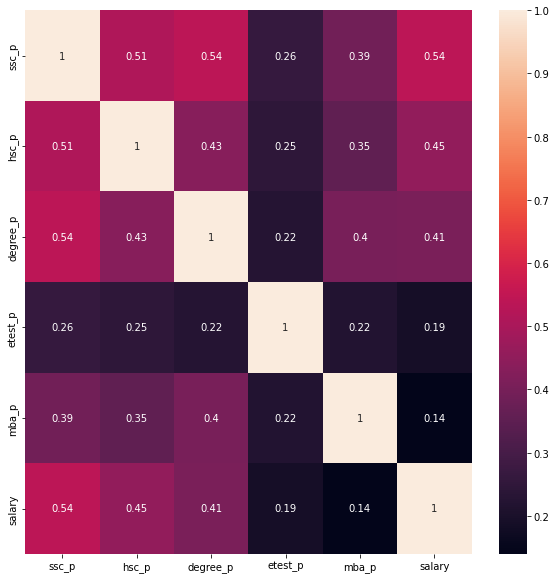

In [326]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method ='pearson'),annot=True)

In [327]:
df_numeric=df[numeric]

In [328]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    '''
    Take the inputs as dataframe and calculate the VIF.
    Returns Data frame with VIF value and respective column name.
    
        Parameters:
                X(Data Frame):Pandas Data Farame
        
        Returns:
                vif(Data Frame): Data frame with VIF value and respective column name.
    '''
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF'))

In [329]:
calc_vif(df_numeric[df_numeric.columns[:-1]])

,variables,VIF
3,etest_p,32.672247
1,hsc_p,56.084529
0,ssc_p,66.944193
4,mba_p,99.284247
2,degree_p,112.708420


In [330]:
def check_muticolinearity(dataframe,threshold = 0.9):
    
    '''
    Take the inputs as dataframe and threshold of correlation.
    Print the number of column and respective column names to be droped.
    
        Parameters:
                dataframe(Data Frame):Pandas Data Farame
        
        Returns:
                Print the number of column and respective column names to be droped.
    
    '''
    corr_matrix =dataframe.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    if len(to_drop)>1:
        print(f'There are {len(to_drop)} columns to remove. And they are {to_drop}')
    else:
         print(f'There are {len(to_drop)} columns to remove.')  

In [331]:
check_muticolinearity(df_numeric[df_numeric.columns[:-1]])

There are 0 columns to remove.


## EDA

In [332]:
df_raw.drop('sl_no',axis=1,inplace=True)

In [333]:
numeric_new=[]
for label,content in df_raw.items():
    if pd.api.types.is_numeric_dtype(content):
        numeric_new.append(label)
numeric_new

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [334]:
numericdf=df_raw[numeric_new]

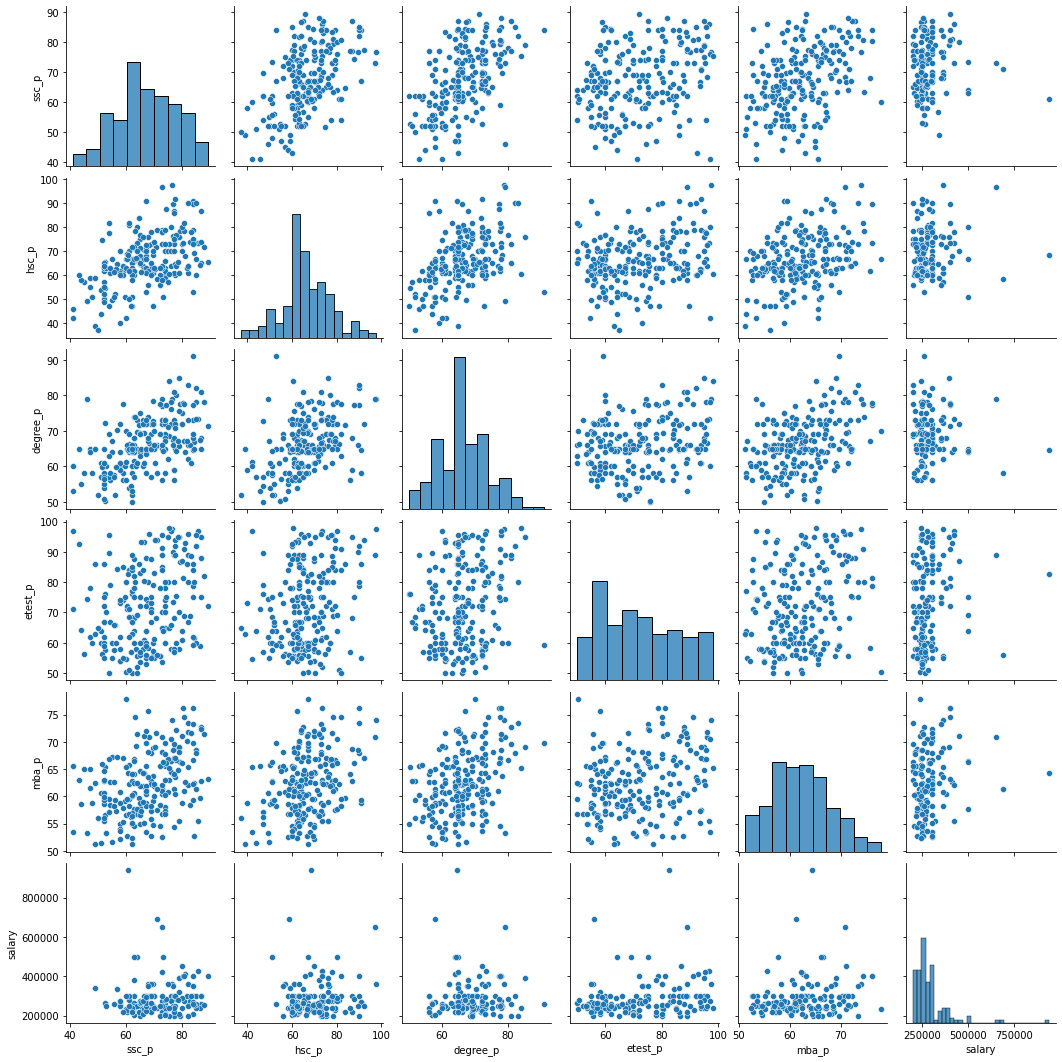

In [335]:
sns.pairplot(numericdf, markers=["o", "s", "D"])

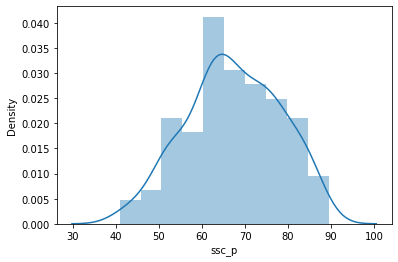

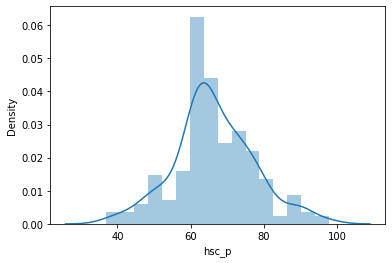

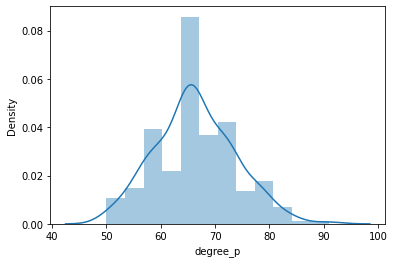

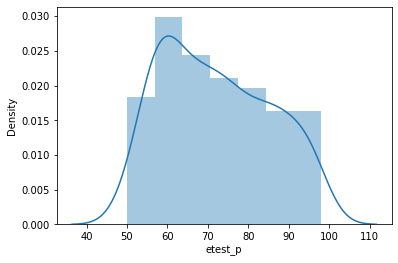

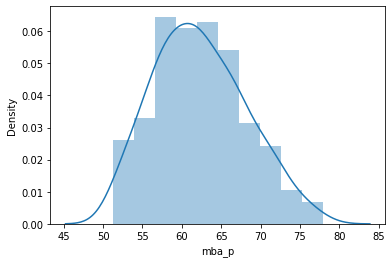

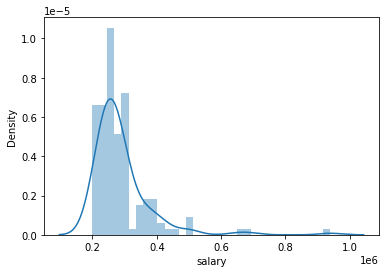

In [336]:
for i in numericdf.columns:
    sns.distplot(numericdf[i])
    plt.show()

In [337]:
not_numeric_new=[]
for label,content in df_raw.items():
    if not pd.api.types.is_numeric_dtype(content):
        not_numeric_new.append(label)
not_numeric_new

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [338]:
nonnumericdf=df_raw[not_numeric_new]

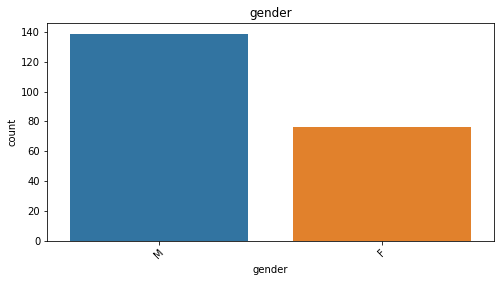

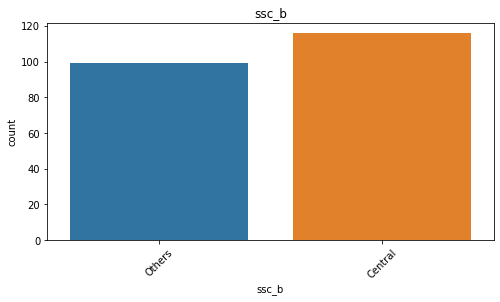

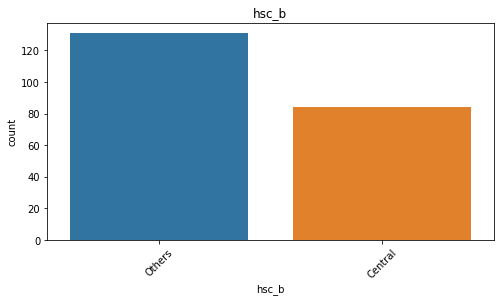

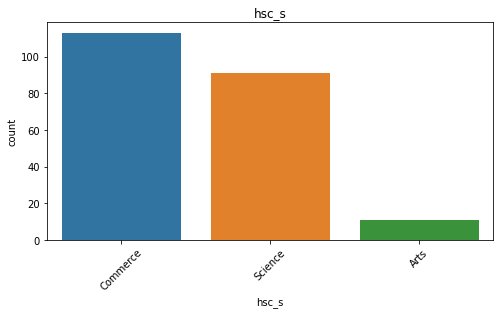

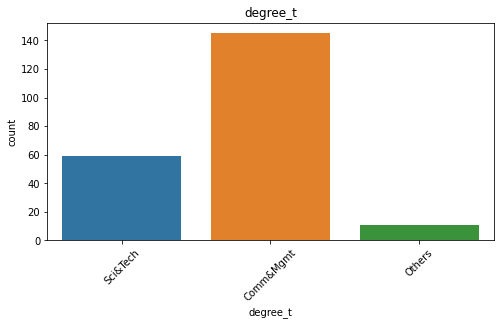

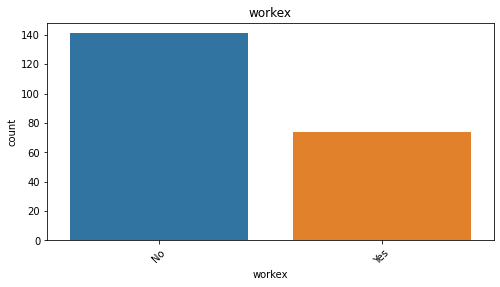

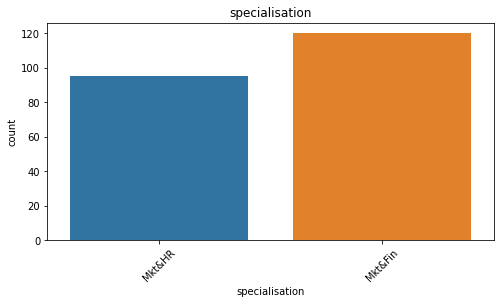

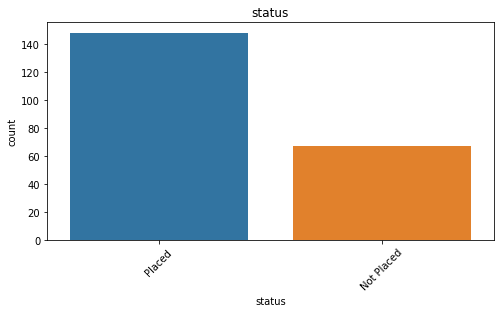

In [339]:
for col in not_numeric_new:
    plt.figure(figsize=(8,4))
    sns.countplot(x=nonnumericdf[col], data=nonnumericdf)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

In [340]:
nonnumericdf.groupby('gender')['status'].count()

gender
F     76
M    139
Name: status, dtype: int64

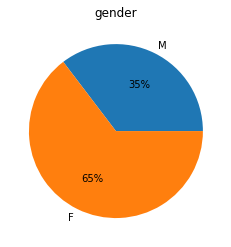

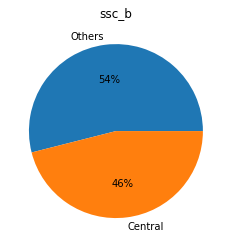

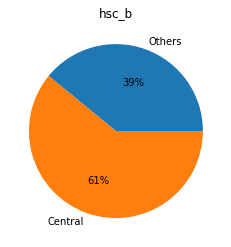

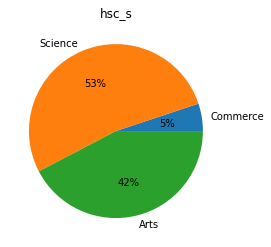

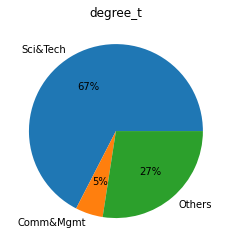

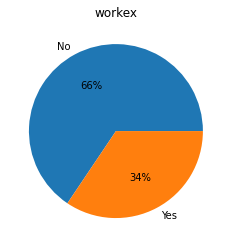

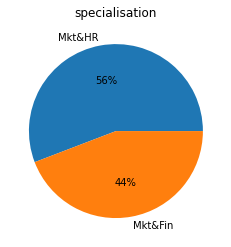

In [341]:
for col in not_numeric_new[:-1]:
    plt.figure(figsize=(8,4))
    plt.pie(nonnumericdf.groupby([col])['status'].count(), labels = nonnumericdf[col].unique(),autopct='%1.0f%%')
    plt.title(col)
    plt.show()

In [342]:
from scipy import stats

In [343]:
def probaplot(col):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(df[col],dist='norm',plot=plt)
    
    plt.subplot(1,2,2)
    sns.boxplot(df[col],color='red')
    
    plt.show()

Prob Plot of ssc_p


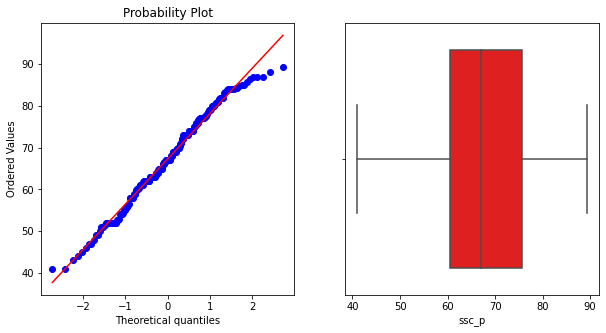

____________________________________________________________________________________________________ 

Prob Plot of hsc_p


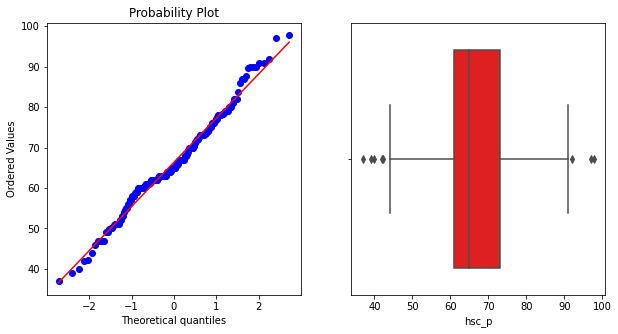

____________________________________________________________________________________________________ 

Prob Plot of degree_p


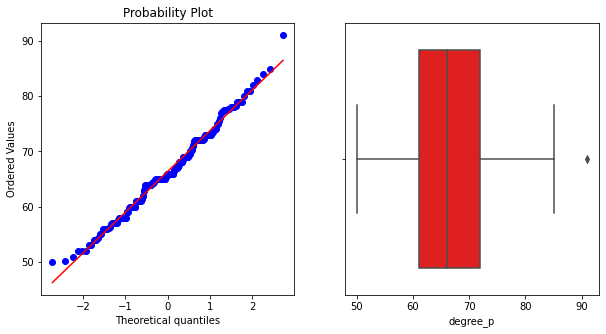

____________________________________________________________________________________________________ 

Prob Plot of etest_p


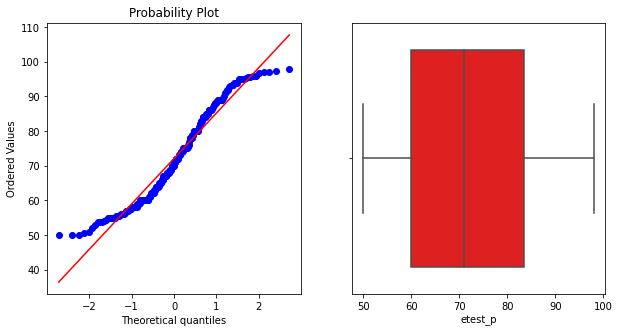

____________________________________________________________________________________________________ 

Prob Plot of mba_p


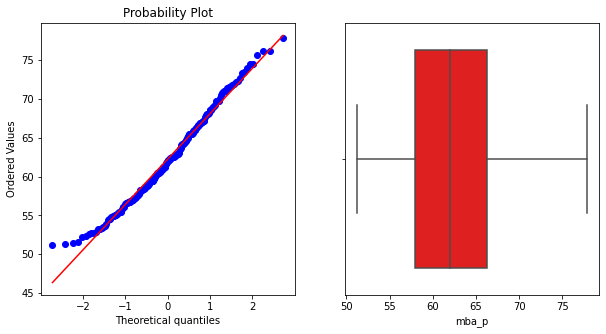

____________________________________________________________________________________________________ 

Prob Plot of salary


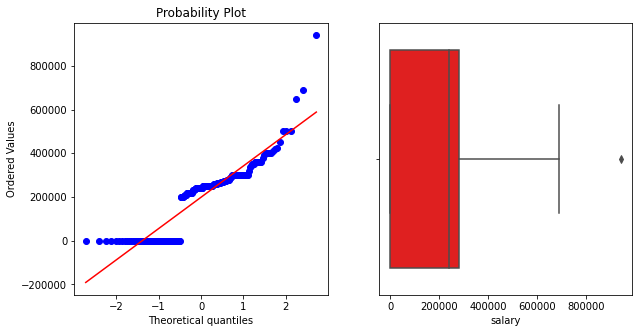

____________________________________________________________________________________________________ 



In [344]:
for i in numericdf.columns:
    print(f'Prob Plot of {i}')
    probaplot(i)
    print('_'*100,'\n')
    plt.show()

## Encoding

In [345]:
for col in not_numeric:
    print(f"\033[1m{col} \n{20 * '-'}\033[0m")
    print(f"\033[1m Unique :{df[col].nunique()}\n{20 * '-'}\033[0m")
    print(f"{20 * '-'}")
    print(df[col].value_counts(), '\n')

gender 
--------------------
 Unique :2
--------------------
--------------------
M    139
F     76
Name: gender, dtype: int64 

ssc_b 
--------------------
 Unique :2
--------------------
--------------------
Central    116
Others      99
Name: ssc_b, dtype: int64 

hsc_b 
--------------------
 Unique :2
--------------------
--------------------
Others     131
Central     84
Name: hsc_b, dtype: int64 

hsc_s 
--------------------
 Unique :3
--------------------
--------------------
Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64 

degree_t 
--------------------
 Unique :3
--------------------
--------------------
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64 

workex 
--------------------
 Unique :2
--------------------
--------------------
No     141
Yes     74
Name: workex, dtype: int64 

specialisation 
--------------------
 Unique :2
--------------------
--------------------
Mkt&Fin    120
Mkt&HR      95
Name: specialisat

In [346]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [347]:
df['gender']=df['gender'].map({'M':0, 'F':1})

In [348]:
df['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [349]:
df['ssc_b']=df['ssc_b'].map({'Others':0, 'Central':1})

In [350]:
df['hsc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [351]:
df['hsc_b']=df['hsc_b'].map({'Others':0, 'Central':1})

In [352]:
df['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [353]:
df=pd.get_dummies(df,columns=['hsc_s','degree_t'])

In [354]:
df['workex'].unique()

array(['No', 'Yes'], dtype=object)

In [355]:
df['workex']=df['workex'].map({'No':0, 'Yes':1})

In [356]:
df['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [357]:
df['specialisation']=df['specialisation'].map({'Mkt&HR':0, 'Mkt&Fin':1})

In [358]:
df['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [359]:
df['status']=df['status'].map({'Placed':0, 'Not Placed':1})

In [360]:
df.drop('salary',axis=1,inplace=True)

### Splitting the data

In [361]:
X=df.drop('status',axis=1)
y=df['status']

In [362]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [363]:
X.shape

(215, 16)

## Scaling

In [364]:
from sklearn.preprocessing import MinMaxScaler

In [365]:
sc=MinMaxScaler(feature_range=(0, 1))

In [366]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## DecisionTree

In [367]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,balanced_accuracy_score,f1_score

In [368]:
M1=DecisionTreeClassifier()
M1.fit(X_train,y_train)
P1=M1.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P1))
print('\n')
print('classification_report')
print(classification_report(y_test,P1))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P1))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M1.predict(X_test)))

confusion_matrix
[[42  2]
 [16 11]]


classification_report
              precision    recall  f1-score   support

           0       0.72      0.95      0.82        44
           1       0.85      0.41      0.55        27

    accuracy                           0.75        71
   macro avg       0.79      0.68      0.69        71
weighted avg       0.77      0.75      0.72        71



Accuracy: 74.64788732394366


Roc Value: 0.680976430976431


## RandomForest

In [369]:
from sklearn.ensemble import RandomForestClassifier

In [370]:
M2=RandomForestClassifier()
M2.fit(X_train,y_train)
P2=M2.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P2))
print('\n')
print('classification_report')
print(classification_report(y_test,P2))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P2))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M2.predict(X_test)))

confusion_matrix
[[43  1]
 [16 11]]


classification_report
              precision    recall  f1-score   support

           0       0.73      0.98      0.83        44
           1       0.92      0.41      0.56        27

    accuracy                           0.76        71
   macro avg       0.82      0.69      0.70        71
weighted avg       0.80      0.76      0.73        71



Accuracy: 76.05633802816901


Roc Value: 0.6923400673400674


In [371]:
Name=['Random Forest Classifier','Decision Tree']
clfs= [RandomForestClassifier(),DecisionTreeClassifier()]

In [372]:
from sklearn.model_selection import KFold,cross_val_score

In [373]:
kfold=KFold(n_splits=5,shuffle=False, random_state=None)
kfold=KFold(n_splits=5,shuffle=False, random_state=None)
results_mean=[]

for i in clfs:
    csv=cross_val_score(i,X_train,y_train,cv=kfold)
    mean_score=csv.mean()
    results_mean.append(mean_score)

score= pd.DataFrame(results_mean,index=Name)
score.columns=['Accuracy']

In [374]:
score.sort_values(by='Accuracy',ascending=False)

,Accuracy
Random Forest Classifier,0.867980
Decision Tree,0.805419


## Feature Selection

In [375]:
from sklearn.feature_selection import SelectFromModel, RFECV
model = RandomForestClassifier()

M37 = RFECV(estimator=model, step=1, cv=kfold, scoring='accuracy', n_jobs=2)

M37 = M37.fit(X_train, y_train)

print('Optimal number of features :', M37.n_features_)

print('Best features :', X.columns[M37.support_])

Optimal number of features : 16
Best features : Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'degree_p', 'workex',
       'etest_p', 'specialisation', 'mba_p', 'hsc_s_Arts', 'hsc_s_Commerce',
       'hsc_s_Science', 'degree_t_Comm&Mgmt', 'degree_t_Others',
       'degree_t_Sci&Tech'],
      dtype='object')


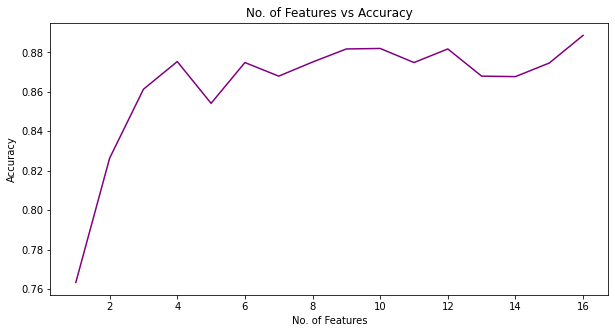

In [376]:
plt.figure(figsize=(10,5))
plt.plot(range(1, len(M37.grid_scores_)+1), np.mean(M37.grid_scores_, axis=1), color='purple')
plt.xlabel("No. of Features")
plt.ylabel("Accuracy")
plt.title("No. of Features vs Accuracy")
plt.show()

In [377]:
feature_imp = pd.DataFrame(M2.feature_importances_ ,index=X.columns[0:40])
feature_imp.sort_values(by=0,ascending=False)

,0
ssc_p,0.254169
degree_p,0.217400
hsc_p,0.208458
mba_p,0.103428
etest_p,0.078584
specialisation,0.028718
workex,0.024843
gender,0.015421
ssc_b,0.012178
hsc_s_Science,0.011408


In [378]:
df=df[['gender', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p',
       'specialisation', 'mba_p', 'hsc_s_Science','hsc_s_Commerce','hsc_s_Arts','status']]

In [379]:
df.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Science,hsc_s_Commerce,hsc_s_Arts,status
0,0,67.00,91.00,58.00,0,55.0,0,58.80,0,1,0,0
1,0,79.33,78.33,77.48,1,86.5,1,66.28,1,0,0,0
2,0,65.00,68.00,64.00,0,75.0,1,57.80,0,0,1,0
3,0,56.00,52.00,52.00,0,66.0,0,59.43,1,0,0,1
4,0,85.80,73.60,73.30,0,96.8,1,55.50,0,1,0,0


In [380]:
X=df.drop('status',axis=1)
y=df['status']

In [381]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [382]:
M2=RandomForestClassifier()
M2.fit(X_train,y_train)
P2=M2.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P2))
print('\n')
print('classification_report')
print(classification_report(y_test,P2))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P2))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M2.predict(X_test)))

confusion_matrix
[[42  2]
 [16 11]]


classification_report
              precision    recall  f1-score   support

           0       0.72      0.95      0.82        44
           1       0.85      0.41      0.55        27

    accuracy                           0.75        71
   macro avg       0.79      0.68      0.69        71
weighted avg       0.77      0.75      0.72        71



Accuracy: 74.64788732394366


Roc Value: 0.680976430976431


In [383]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(M2, open(filename, 'wb'))